# IMPORTING ESSENTIAL LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('dark_background')
import warnings
warnings.filterwarnings('ignore')

# Reading the cricket dataset


In [2]:
a=pd.read_csv("Top_100_batsman.csv")
a.head()

,POS,PLAYER,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,ViratKohli,177,169,26,5412,113,37.84,"4,112",131.61,5,36,480,190
1,2,Suresh Raina,193,189,28,5368,100*,33.34,"3,914",137.14,1,38,493,194
2,3,Rohit Sharma,188,183,28,4898,109*,31.60,"3,744",130.82,1,36,431,194
3,4,David Warner,126,126,17,4706,126,43.17,"3,305",142.39,4,44,458,181
4,5,Shikhar Dhawan,159,158,21,4579,97*,33.42,"3,669",124.80,0,37,524,96


In [3]:
a.shape

(100, 14)

In [4]:
a.columns

Index(['POS', 'PLAYER', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR',
       '100', '50', '4s', '6s'],
      dtype='object')

In [5]:
a=a.drop(['POS','NO','Avg'],axis="columns")
a

,PLAYER,Mat,Inns,Runs,HS,BF,SR,100,50,4s,6s
0,ViratKohli,177,169,5412,113,"4,112",131.61,5,36,480,190
1,Suresh Raina,193,189,5368,100*,"3,914",137.14,1,38,493,194
2,Rohit Sharma,188,183,4898,109*,"3,744",130.82,1,36,431,194
3,David Warner,126,126,4706,126,"3,305",142.39,4,44,458,181
4,Shikhar Dhawan,159,158,4579,97*,"3,669",124.80,0,37,524,96
...,...,...,...,...,...,...,...,...,...,...,...
95,Piyush Chawla,157,81,584,24*,524,111.45,0,0,54,18
96,Hashim Amla,16,16,577,104*,407,141.76,2,3,60,21
97,Vijay Shankar,33,29,557,63*,416,133.89,0,2,34,24
98,Corey Anderson,30,29,538,95*,423,127.18,0,3,40,31


In [6]:
a['Matches']=a['Mat']
a.rename(columns={'BF':'Balls_Faced','PLAYER':'Player'},inplace=True)

# Checking null values in the dataset

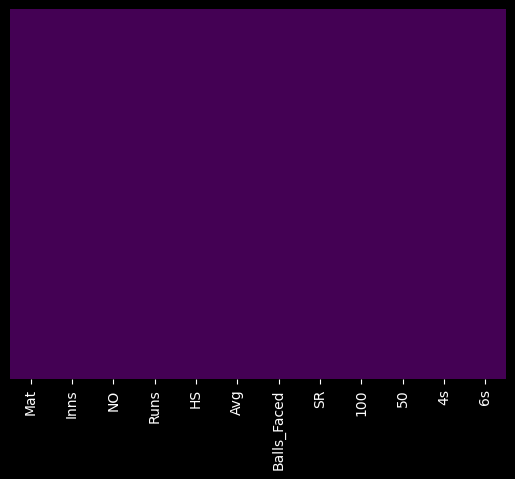

In [29]:
sns.heatmap(a.isnull(),cmap='viridis',cbar=False,yticklabels=False)
plt.show()

# Removing the duplicates

In [8]:
a.drop_duplicates(inplace=True)
a.shape

(100, 12)

In [9]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       100 non-null    object 
 1   Mat          100 non-null    int64  
 2   Inns         100 non-null    int64  
 3   Runs         100 non-null    int64  
 4   HS           100 non-null    object 
 5   Balls_Faced  100 non-null    object 
 6   SR           100 non-null    float64
 7   100          100 non-null    int64  
 8   50           100 non-null    int64  
 9   4s           100 non-null    int64  
 10  6s           100 non-null    int64  
 11  Matches      100 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 10.2+ KB


# Data-cleaning

In [10]:
# removing * from 100* in HS column so that it can be used in calculations further.
def handleHS(value):
    value=str(value).split('*')
    value=value[0]
    return int(value)
a['HS']=a['HS'].apply(handleHS)
a['HS'].head()
a['HS_ELIGIBLE']=a['HS']
# removing , from Balls_Faced column
def handleComma(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return int(value)
    else:
        return int(value)
a['Balls_Faced']=a['Balls_Faced'].apply(handleComma)
a['Balls_Faced'].unique()

array([4112, 3914, 3744, 3305, 3669, 2969, 3215, 3380, 2906, 3404, 3133,
       2815, 2562, 2620, 2241, 2186, 2358, 2353, 1877, 2120, 1755, 2106,
       1866, 2222, 1764, 1948, 1696, 1882, 1495, 1636, 1568, 1431, 1612,
       1572, 1462, 1333, 1346, 1329, 1067, 1449, 1392, 1324, 1313, 1173,
       1226, 1156, 1139, 1109, 1212, 1118,  751,  867,  919, 1263, 1075,
        964,  910,  988, 1007,  946,  805,  806,  853,  852,  690,  822,
        768,  743,  836,  686,  750,  756,  755,  610,  807,  683,  705,
        600,  702,  630,  532,  458,  552,  589,  668,  575,  531,  577,
        544,  481,  424,  524,  407,  416,  423,  453], dtype=int64)

# Data visualization

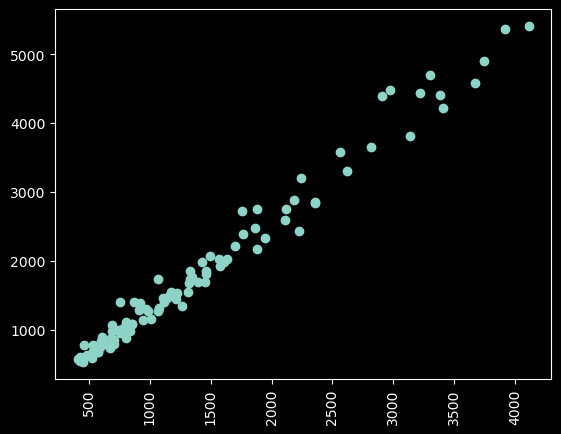

In [27]:
plt.scatter(a['Balls_Faced'],a['Runs'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='SR', ylabel='Matches'>

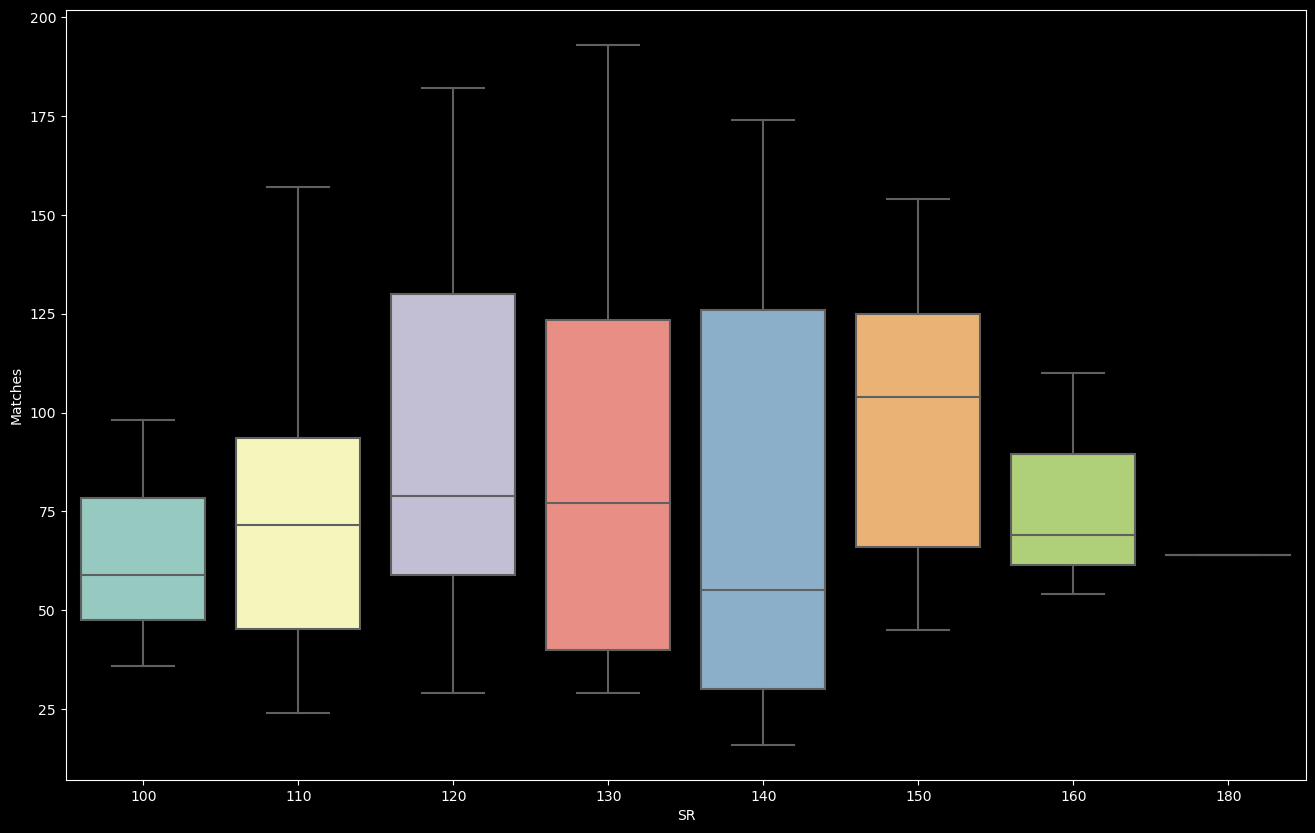

In [12]:
def SR(value):
    if value < 110:
        value = 100
    elif value > 110 and value < 120:
        value = 110
    elif value > 120 and value < 130:
        value = 120
    elif value > 130 and value < 140:
        value = 130
    elif value > 140 and value < 150:
        value = 140
    elif value > 150 and value < 160:
        value = 150
    elif value > 160 and value < 170:
        value = 160
    elif value > 170 and value < 180:
        value = 170
    elif value > 180:
        value = 180
    return int(value)

a['SR'] = a['SR'].apply(SR)
a['SR'].head()

plt.figure(figsize=(16,10))
sns.boxplot(x=a['SR'], y=a['Matches'], data=a)

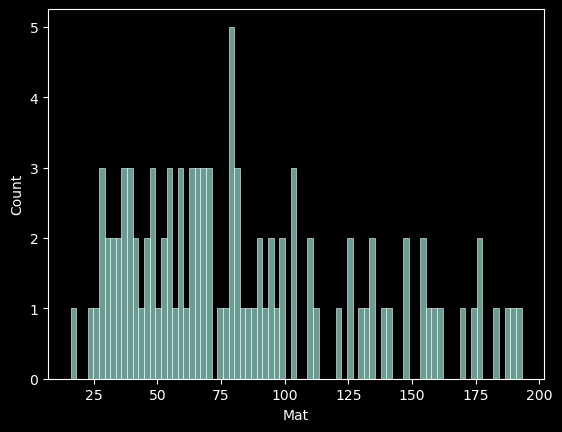

In [13]:
sorted(a['Mat'].unique())
sns.histplot(a['Mat'],bins=80)
plt.show()

it is clear that we must set an initial eligibility criterion for players.
After visualisations it is clear that we must take players who habve at laest played 80 matches and have higherst score above 80
which shows that they are consistent in playing matches and have potential to score a century.

In [14]:
p = 0
def drop_Matches(value):
    global p
    p = p + 1
    if value < 80:
        return False
    return True

a['Mat'] = a['Mat'].apply(drop_Matches)
a = a[a['Mat']]
a.reset_index(drop=True, inplace=True)
a.shape

(46, 13)

In [15]:
p = 0
def drop_Matches(value):
    global p
    p = p + 1
    if value < 100:
        return False
    return True

a['HS_ELIGIBLE'] = a['HS_ELIGIBLE'].apply(drop_Matches)
a = a[a['HS_ELIGIBLE']]
a.reset_index(drop=True, inplace=True)
a.shape

(19, 13)

In [16]:
a.rename(columns={'Mat':'Mat_eligible'},inplace=True)
a=a.drop(['Mat_eligible','HS_ELIGIBLE'],axis="columns")
a

,Player,Inns,Runs,HS,Balls_Faced,SR,100,50,4s,6s,Matches
0,ViratKohli,169,5412,113,4112,130,5,36,480,190,177
1,Suresh Raina,189,5368,100,3914,130,1,38,493,194,193
2,Rohit Sharma,183,4898,109,3744,130,1,36,431,194,188
3,David Warner,126,4706,126,3305,140,4,44,458,181,126
4,Chris Gayle,124,4484,175,2969,150,6,28,369,326,125
5,AB de Villiers,142,4395,133,2906,150,3,33,357,212,154
6,Ajinkya Rahane,132,3820,105,3133,120,2,27,404,74,140
7,Shane Watson,130,3575,117,2562,130,4,19,343,177,134
8,Ambati Rayudu,140,3300,100,2620,120,1,18,278,120,147
9,Yusuf Pathan,154,3204,100,2241,140,1,13,262,158,174


# Grouping of strike rates

In [17]:
a['SR'].value_counts()

130    8
120    6
150    3
140    2
Name: SR, dtype: int64

In [18]:
def SR(value):
    if value < 110:
        value = 100
    elif value > 110 and value < 120:
        value = 110
    elif value > 120 and value < 130:
        value = 120
    elif value > 130 and value < 140:
        value = 130
    elif value > 140 and value < 150:
        value = 140
    elif value > 150 and value < 160:
        value = 150
    elif value > 160 :
        value = 160
  
    return int(value)

a['SR'] = a['SR'].apply(SR)
a['SR'].head()


0    130
1    130
2    130
3    140
4    150
Name: SR, dtype: int64

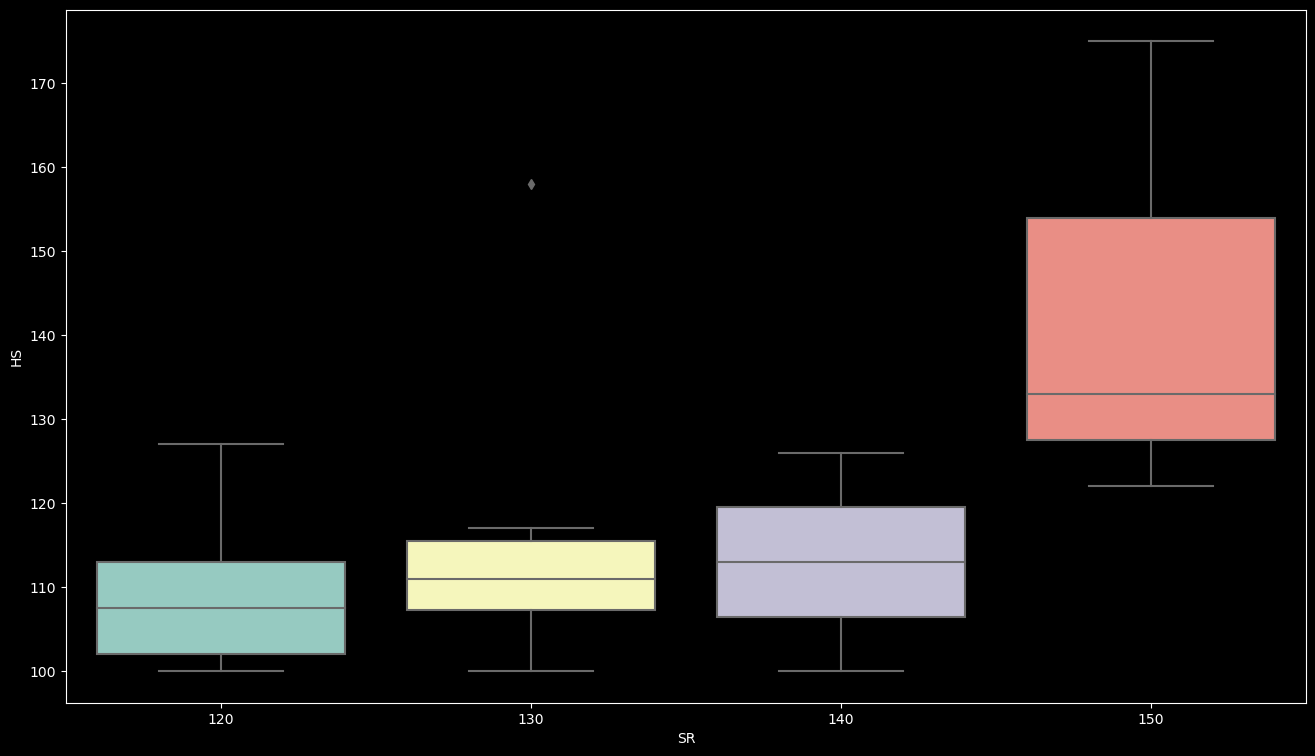

In [19]:
plt.figure(figsize=(16,9))
sns.boxplot(x=a['SR'], y=a['HS'], data=a)
plt.show()

## A strike rate of 140 is favorable because they have played more matches.Hence if the players are playing more matches and their strike rate is fair(i.e 140 )hence they are better than the one playing less matches and having strike rate above and below 140,150 as they are consistent.

In [20]:
b = a[a['SR'] == 140]['Player']
c = a[a['SR'] == 150]['Player']
print(b,c)

3    David Warner
9    Yusuf Pathan
Name: Player, dtype: object 4         Chris Gayle
5      AB de Villiers
12    Virender Sehwag
Name: Player, dtype: object


# BEST 5 Batsmens through EDA
## 1    David Warner
## 2    Yusuf Pathan
## 3    Chris Gayle
## 4    AB de Villiers
## 5    Virender Sehwag

In [21]:
#Initial cleaning of dataset
a=pd.read_csv("Top_100_batsman.csv")
a.head()
a=a.drop(['POS'],axis="columns")
a['Matches']=a['Mat']
a.rename(columns={'BF':'Balls_Faced','PLAYER':'Player'},inplace=True)
# removing * from 100* in HS column so that it can be used in calculations further.
def handleHS(value):
    value=str(value).split('*')
    value=value[0]
    return int(value)
a['HS']=a['HS'].apply(handleHS)
a['HS'].head()
a['HS_ELIGIBLE']=a['HS']
# removing , from Balls_Faced column
def handleComma(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return int(value)
    else:
        return int(value)
a['Balls_Faced']=a['Balls_Faced'].apply(handleComma)
a['Balls_Faced'].unique()
a.drop(['HS_ELIGIBLE','Matches','Player'],inplace=True,axis='columns')
a

,Mat,Inns,NO,Runs,HS,Avg,Balls_Faced,SR,100,50,4s,6s
0,177,169,26,5412,113,37.84,4112,131.61,5,36,480,190
1,193,189,28,5368,100,33.34,3914,137.14,1,38,493,194
2,188,183,28,4898,109,31.60,3744,130.82,1,36,431,194
3,126,126,17,4706,126,43.17,3305,142.39,4,44,458,181
4,159,158,21,4579,97,33.42,3669,124.80,0,37,524,96
...,...,...,...,...,...,...,...,...,...,...,...,...
95,157,81,32,584,24,11.91,524,111.45,0,0,54,18
96,16,16,3,577,104,44.38,407,141.76,2,3,60,21
97,33,29,11,557,63,30.94,416,133.89,0,2,34,24
98,30,29,7,538,95,24.45,423,127.18,0,3,40,31


# Training of model and predicting the accuracy of model

In [22]:

X=a.drop(['Runs'],axis='columns')
y=a['Runs']
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
reg=LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.9985863437825522

# By this model we can predict the runs scored by the batsman to a good extent 
# Click here to go to the website https://shreyans2004.github.io/Runs/